# Baseball Case Study

Data from 2014 Major League Baseball seasons.
We have to develop an algorithm that predicts the number of wins for a given team in the 2015 season.

In [1]:
#Importing Some Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn import svm
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Loading the Dataset

In [3]:
#Checking the shape of the dataset
df.shape

(30, 17)

We have 30 rows and 17 columns in the dataset

In [4]:
df.rename(columns={ 'R' : 'Runs', 'AB' : 'At Bats', 
 'H' : 'Hits','2B' : 'Doubles','3B' : 'Triples','HR' : 'Homeruns','BB' : 'Base on Balls','W' : 'Wins','SO' : 'Strikeouts',
 'SB' : 'Stolen Bases','RA' : 'Runs Allowed','ER' : 'Earned Runs','ERA' : 'Earned Run Average','CG' : 'Complete Games',
'SHO' : 'Shutouts','SV' : 'Saves','E' : 'Errors'}, inplace=True)

Renaming the columns with full form

In [5]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Base on Balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above observation we can say that there is no null values in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

All the columns have numerical values and our target variable 'Wins'  also have numerical value

In [7]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Base on Balls', 'Strikeouts', 'Stolen Bases', 'Runs Allowed',
       'Earned Runs', 'Earned Run Average', 'Complete Games', 'Shutouts',
       'Saves', 'Errors'],
      dtype='object')

In [8]:
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Base on Balls         0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

As we observed the data there is no null values

In [9]:
df.nunique()

Wins                  24
Runs                  28
At Bats               29
Hits                  29
Doubles               22
Triples               23
Homeruns              27
Base on Balls         29
Strikeouts            29
Stolen Bases          27
Runs Allowed          30
Earned Runs           30
Earned Run Average    30
Complete Games         9
Shutouts              12
Saves                 20
Errors                21
dtype: int64

<AxesSubplot:xlabel='Wins', ylabel='Density'>

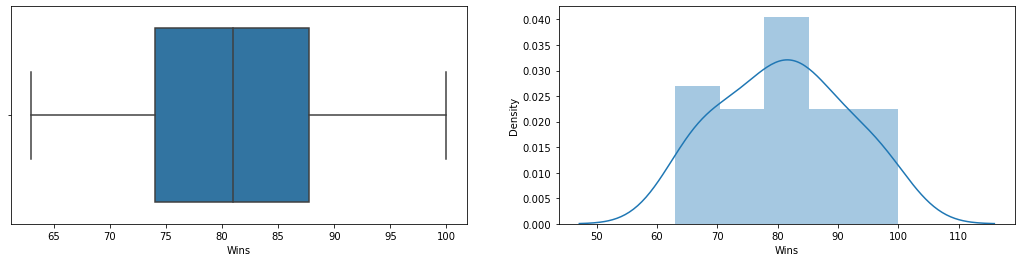

In [10]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Wins'])
plt.subplot(1,2,2)
sns.distplot(df['Wins'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Runs', ylabel='Density'>

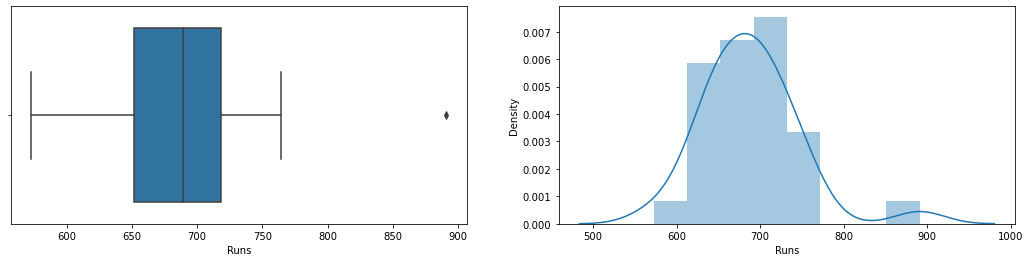

In [11]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Runs'])
plt.subplot(1,2,2)
sns.distplot(df['Runs'])

As we can see there is outlier available and the data is positively skewed

<AxesSubplot:xlabel='At Bats', ylabel='Density'>

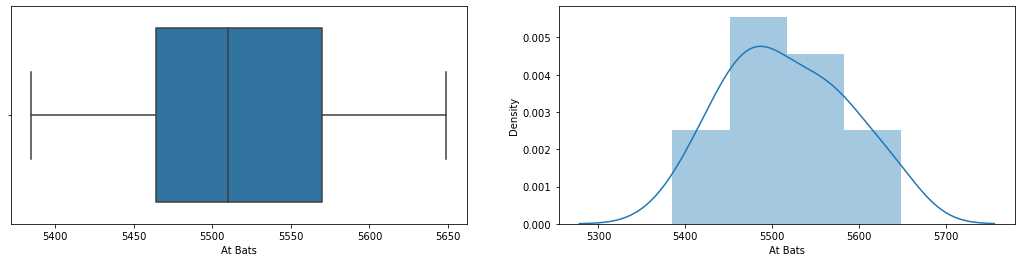

In [12]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['At Bats'])
plt.subplot(1,2,2)
sns.distplot(df['At Bats'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Hits', ylabel='Density'>

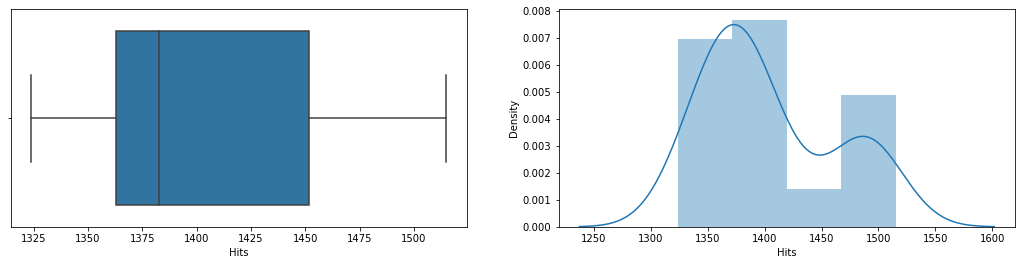

In [13]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Hits'])
plt.subplot(1,2,2)
sns.distplot(df['Hits'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Doubles', ylabel='Density'>

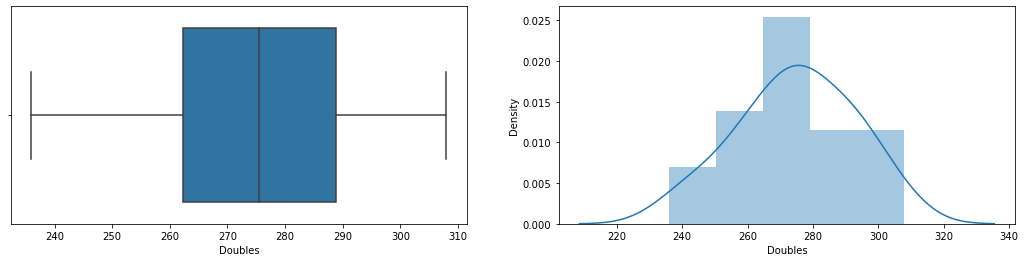

In [14]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Doubles'])
plt.subplot(1,2,2)
sns.distplot(df['Doubles'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Triples', ylabel='Density'>

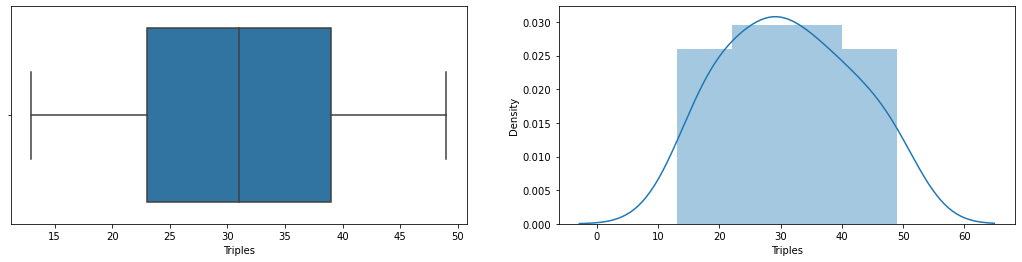

In [15]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Triples'])
plt.subplot(1,2,2)
sns.distplot(df['Triples'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Homeruns', ylabel='Density'>

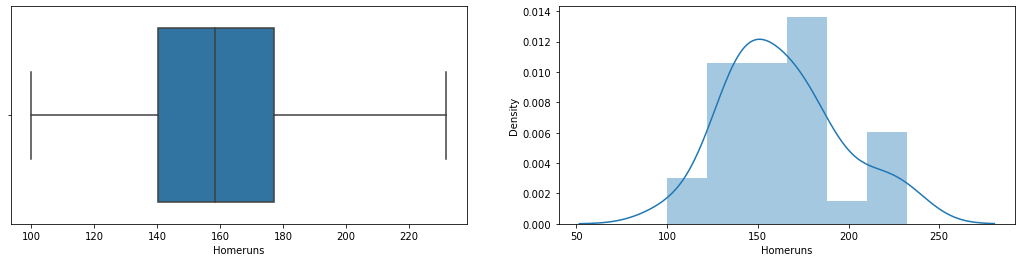

In [16]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Homeruns'])
plt.subplot(1,2,2)
sns.distplot(df['Homeruns'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Base on Balls', ylabel='Density'>

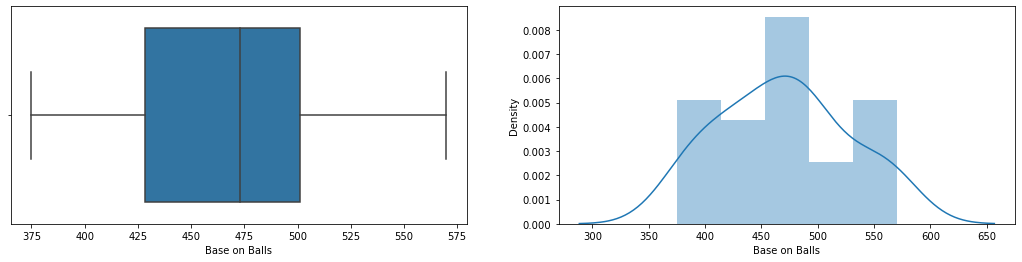

In [17]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Base on Balls'])
plt.subplot(1,2,2)
sns.distplot(df['Base on Balls'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Strikeouts', ylabel='Density'>

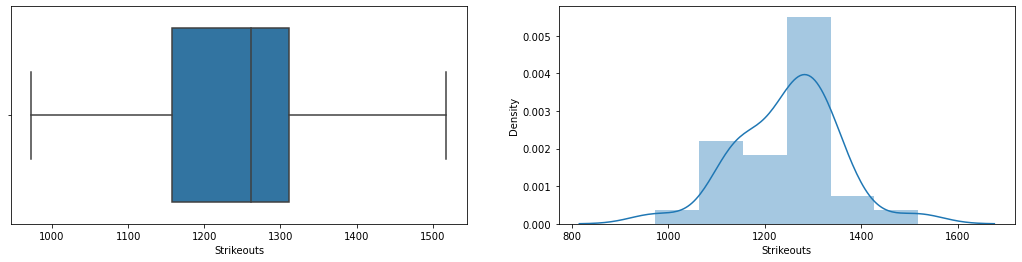

In [18]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Strikeouts'])
plt.subplot(1,2,2)
sns.distplot(df['Strikeouts'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Stolen Bases', ylabel='Density'>

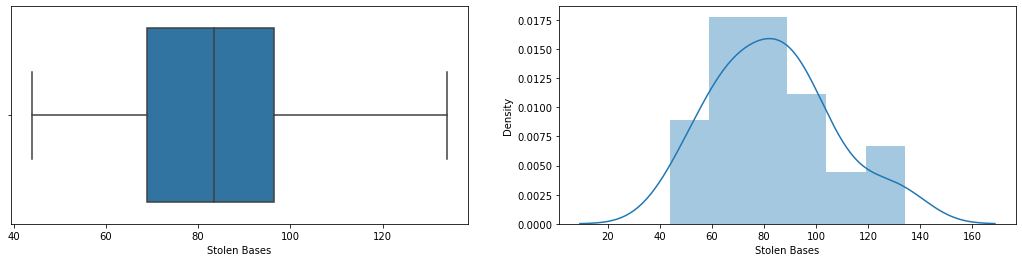

In [19]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Stolen Bases'])
plt.subplot(1,2,2)
sns.distplot(df['Stolen Bases'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Runs Allowed', ylabel='Density'>

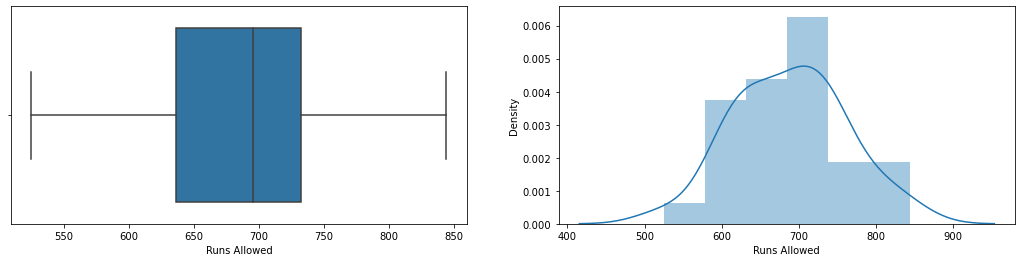

In [20]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Runs Allowed'])
plt.subplot(1,2,2)
sns.distplot(df['Runs Allowed'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Earned Runs', ylabel='Density'>

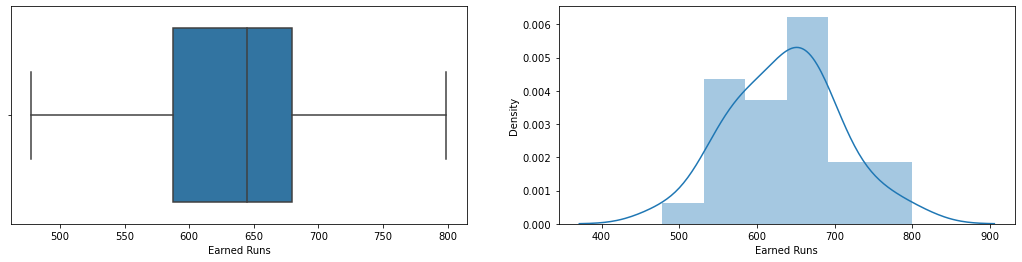

In [21]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Earned Runs'])
plt.subplot(1,2,2)
sns.distplot(df['Earned Runs'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Earned Run Average', ylabel='Density'>

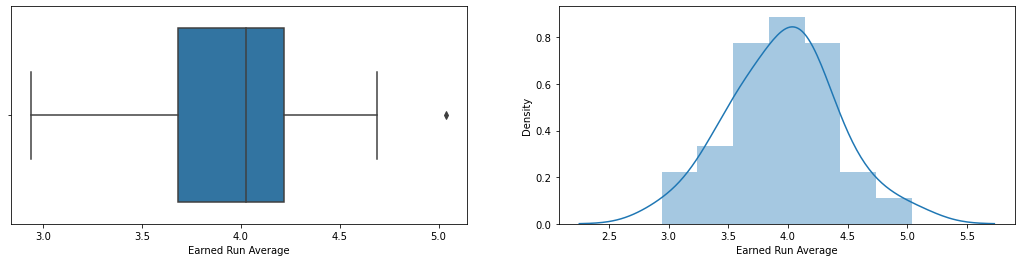

In [22]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Earned Run Average'])
plt.subplot(1,2,2)
sns.distplot(df['Earned Run Average'])

As we can see there is outlier present in the dataset and the data is not much skewed

<AxesSubplot:xlabel='Complete Games', ylabel='Density'>

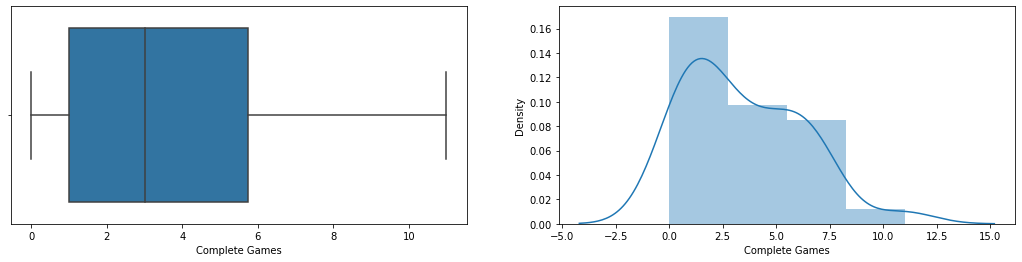

In [23]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Complete Games'])
plt.subplot(1,2,2)
sns.distplot(df['Complete Games'])

As we can see there is no outlier available and the data is not much skewed

<AxesSubplot:xlabel='Shutouts', ylabel='Density'>

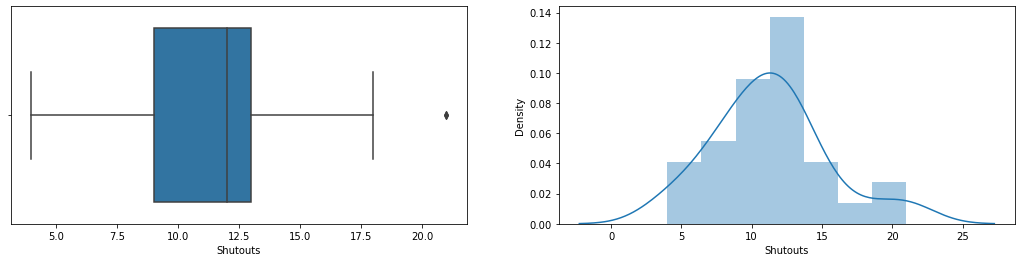

In [24]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Shutouts'])
plt.subplot(1,2,2)
sns.distplot(df['Shutouts'])

As we can see there is outlier present in the dataset and the data is not much skewed

<AxesSubplot:xlabel='Saves', ylabel='Density'>

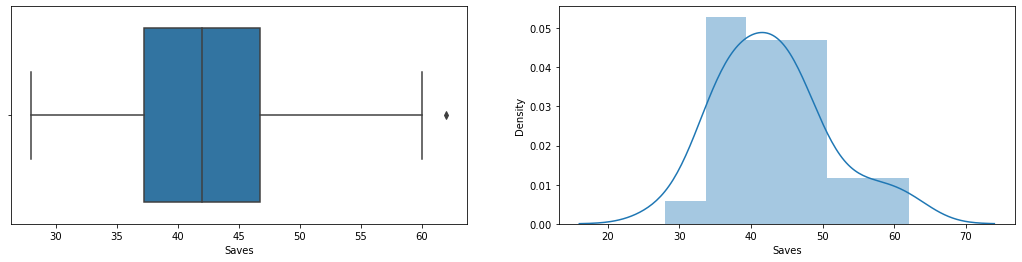

In [25]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Saves'])
plt.subplot(1,2,2)
sns.distplot(df['Saves'])

As we can see there is outlier present in the dataset and the data is not much skewed

<AxesSubplot:xlabel='Errors', ylabel='Density'>

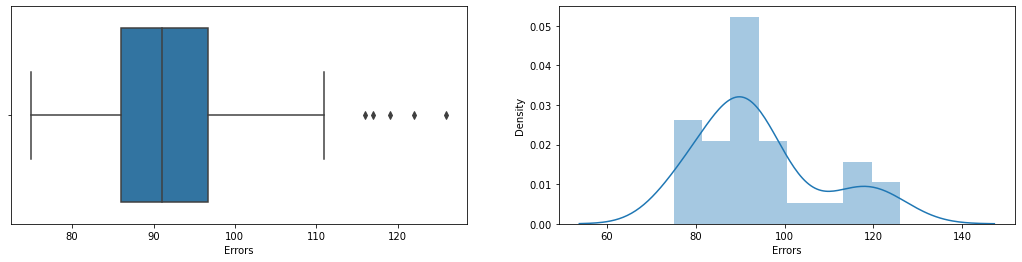

In [26]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Errors'])
plt.subplot(1,2,2)
sns.distplot(df['Errors'])

As we can see there is outlier present in the dataset and the data is not much skewed

<AxesSubplot:xlabel='Hits', ylabel='Wins'>

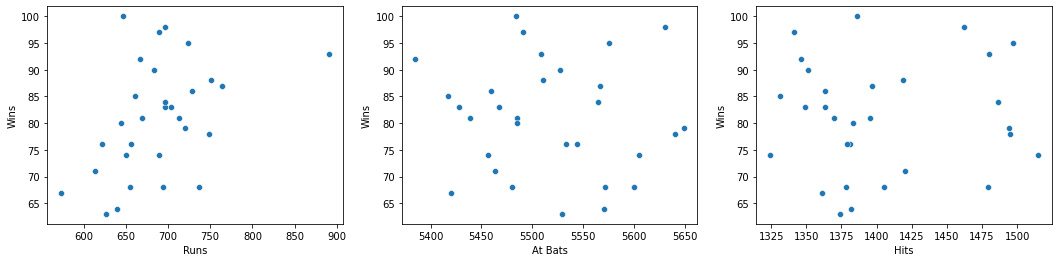

In [27]:
plt.figure(figsize= (18,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df , x = 'Runs',y ='Wins')
plt.subplot(1,3,2)
sns.scatterplot(data = df , x = 'At Bats',y ='Wins')
plt.subplot(1,3,3)
sns.scatterplot(data = df , x = 'Hits',y ='Wins')

We can see that there is single outlier present in the Runs Column and not much relation between the 'At bats' and 'hits' column but there is relation between runs and wins column. as runs are increasing the wins also increasing

<AxesSubplot:xlabel='Homeruns', ylabel='Wins'>

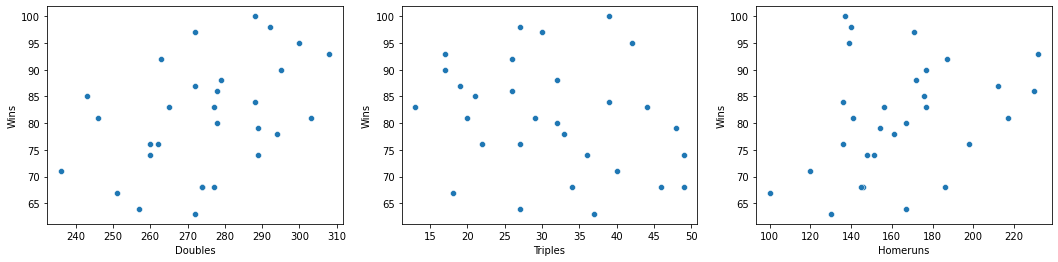

In [28]:
plt.figure(figsize= (18,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df , x = 'Doubles',y ='Wins')
plt.subplot(1,3,2)
sns.scatterplot(data = df , x = 'Triples',y ='Wins')
plt.subplot(1,3,3)
sns.scatterplot(data = df , x = 'Homeruns',y ='Wins')

We can see that the relation between the doubles and wins , as doubles are increassing and same as Homeruns

But there is no major relation between the triples and wins column

<AxesSubplot:xlabel='Stolen Bases', ylabel='Wins'>

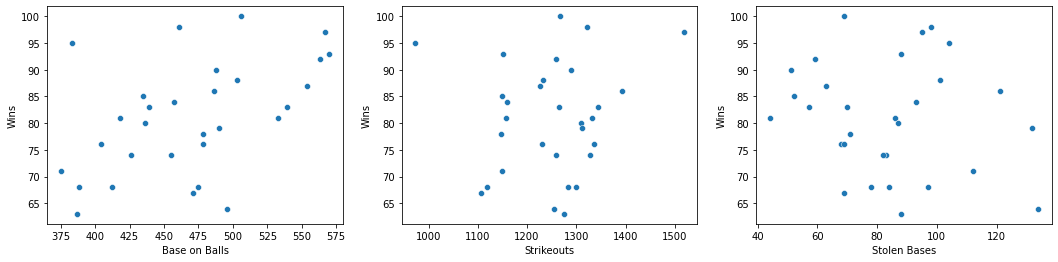

In [29]:
plt.figure(figsize= (18,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df , x = 'Base on Balls',y ='Wins')
plt.subplot(1,3,2)
sns.scatterplot(data = df , x = 'Strikeouts',y ='Wins')
plt.subplot(1,3,3)
sns.scatterplot(data = df , x = 'Stolen Bases',y ='Wins')

We can see that the relation between the Base on Balls and wins , as base on balls are increassing the wins also increasing and same as Strikeouts

But there is no major relation between the Stolen bases and wins column

<AxesSubplot:xlabel='Earned Run Average', ylabel='Wins'>

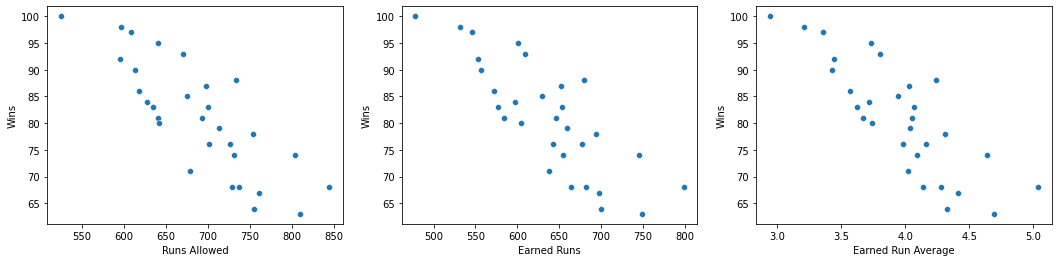

In [30]:
plt.figure(figsize= (18,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df , x = 'Runs Allowed',y ='Wins')
plt.subplot(1,3,2)
sns.scatterplot(data = df , x = 'Earned Runs',y ='Wins')
plt.subplot(1,3,3)
sns.scatterplot(data = df , x = 'Earned Run Average',y ='Wins')

There are some major relation between the all three columns and wins column 

As Runs allowed are increasing the wins are decreasing and same for the remaining two columns

<AxesSubplot:xlabel='Saves', ylabel='Wins'>

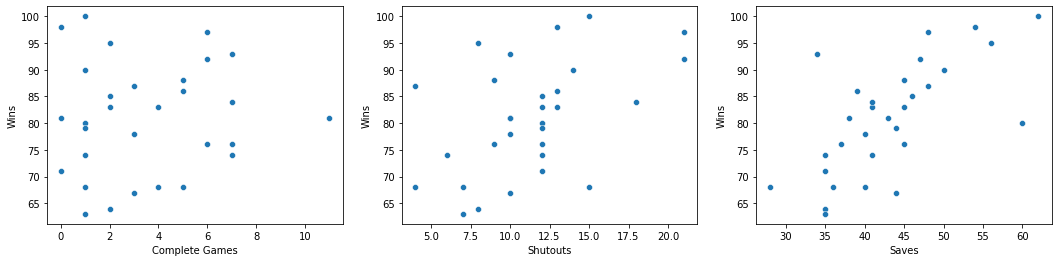

In [31]:
plt.figure(figsize= (18,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df , x = 'Complete Games',y ='Wins')
plt.subplot(1,3,2)
sns.scatterplot(data = df , x = 'Shutouts',y ='Wins')
plt.subplot(1,3,3)
sns.scatterplot(data = df , x = 'Saves',y ='Wins')

We can see that there are no major relation between complete games andd wins column but ther is positive relation between saves and wins column

<AxesSubplot:xlabel='Errors', ylabel='Wins'>

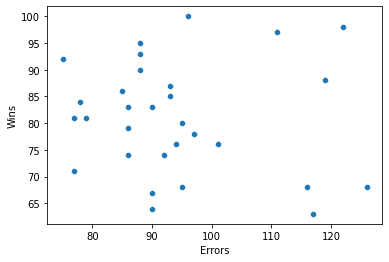

In [32]:
sns.scatterplot(data = df , x = 'Errors',y ='Wins')

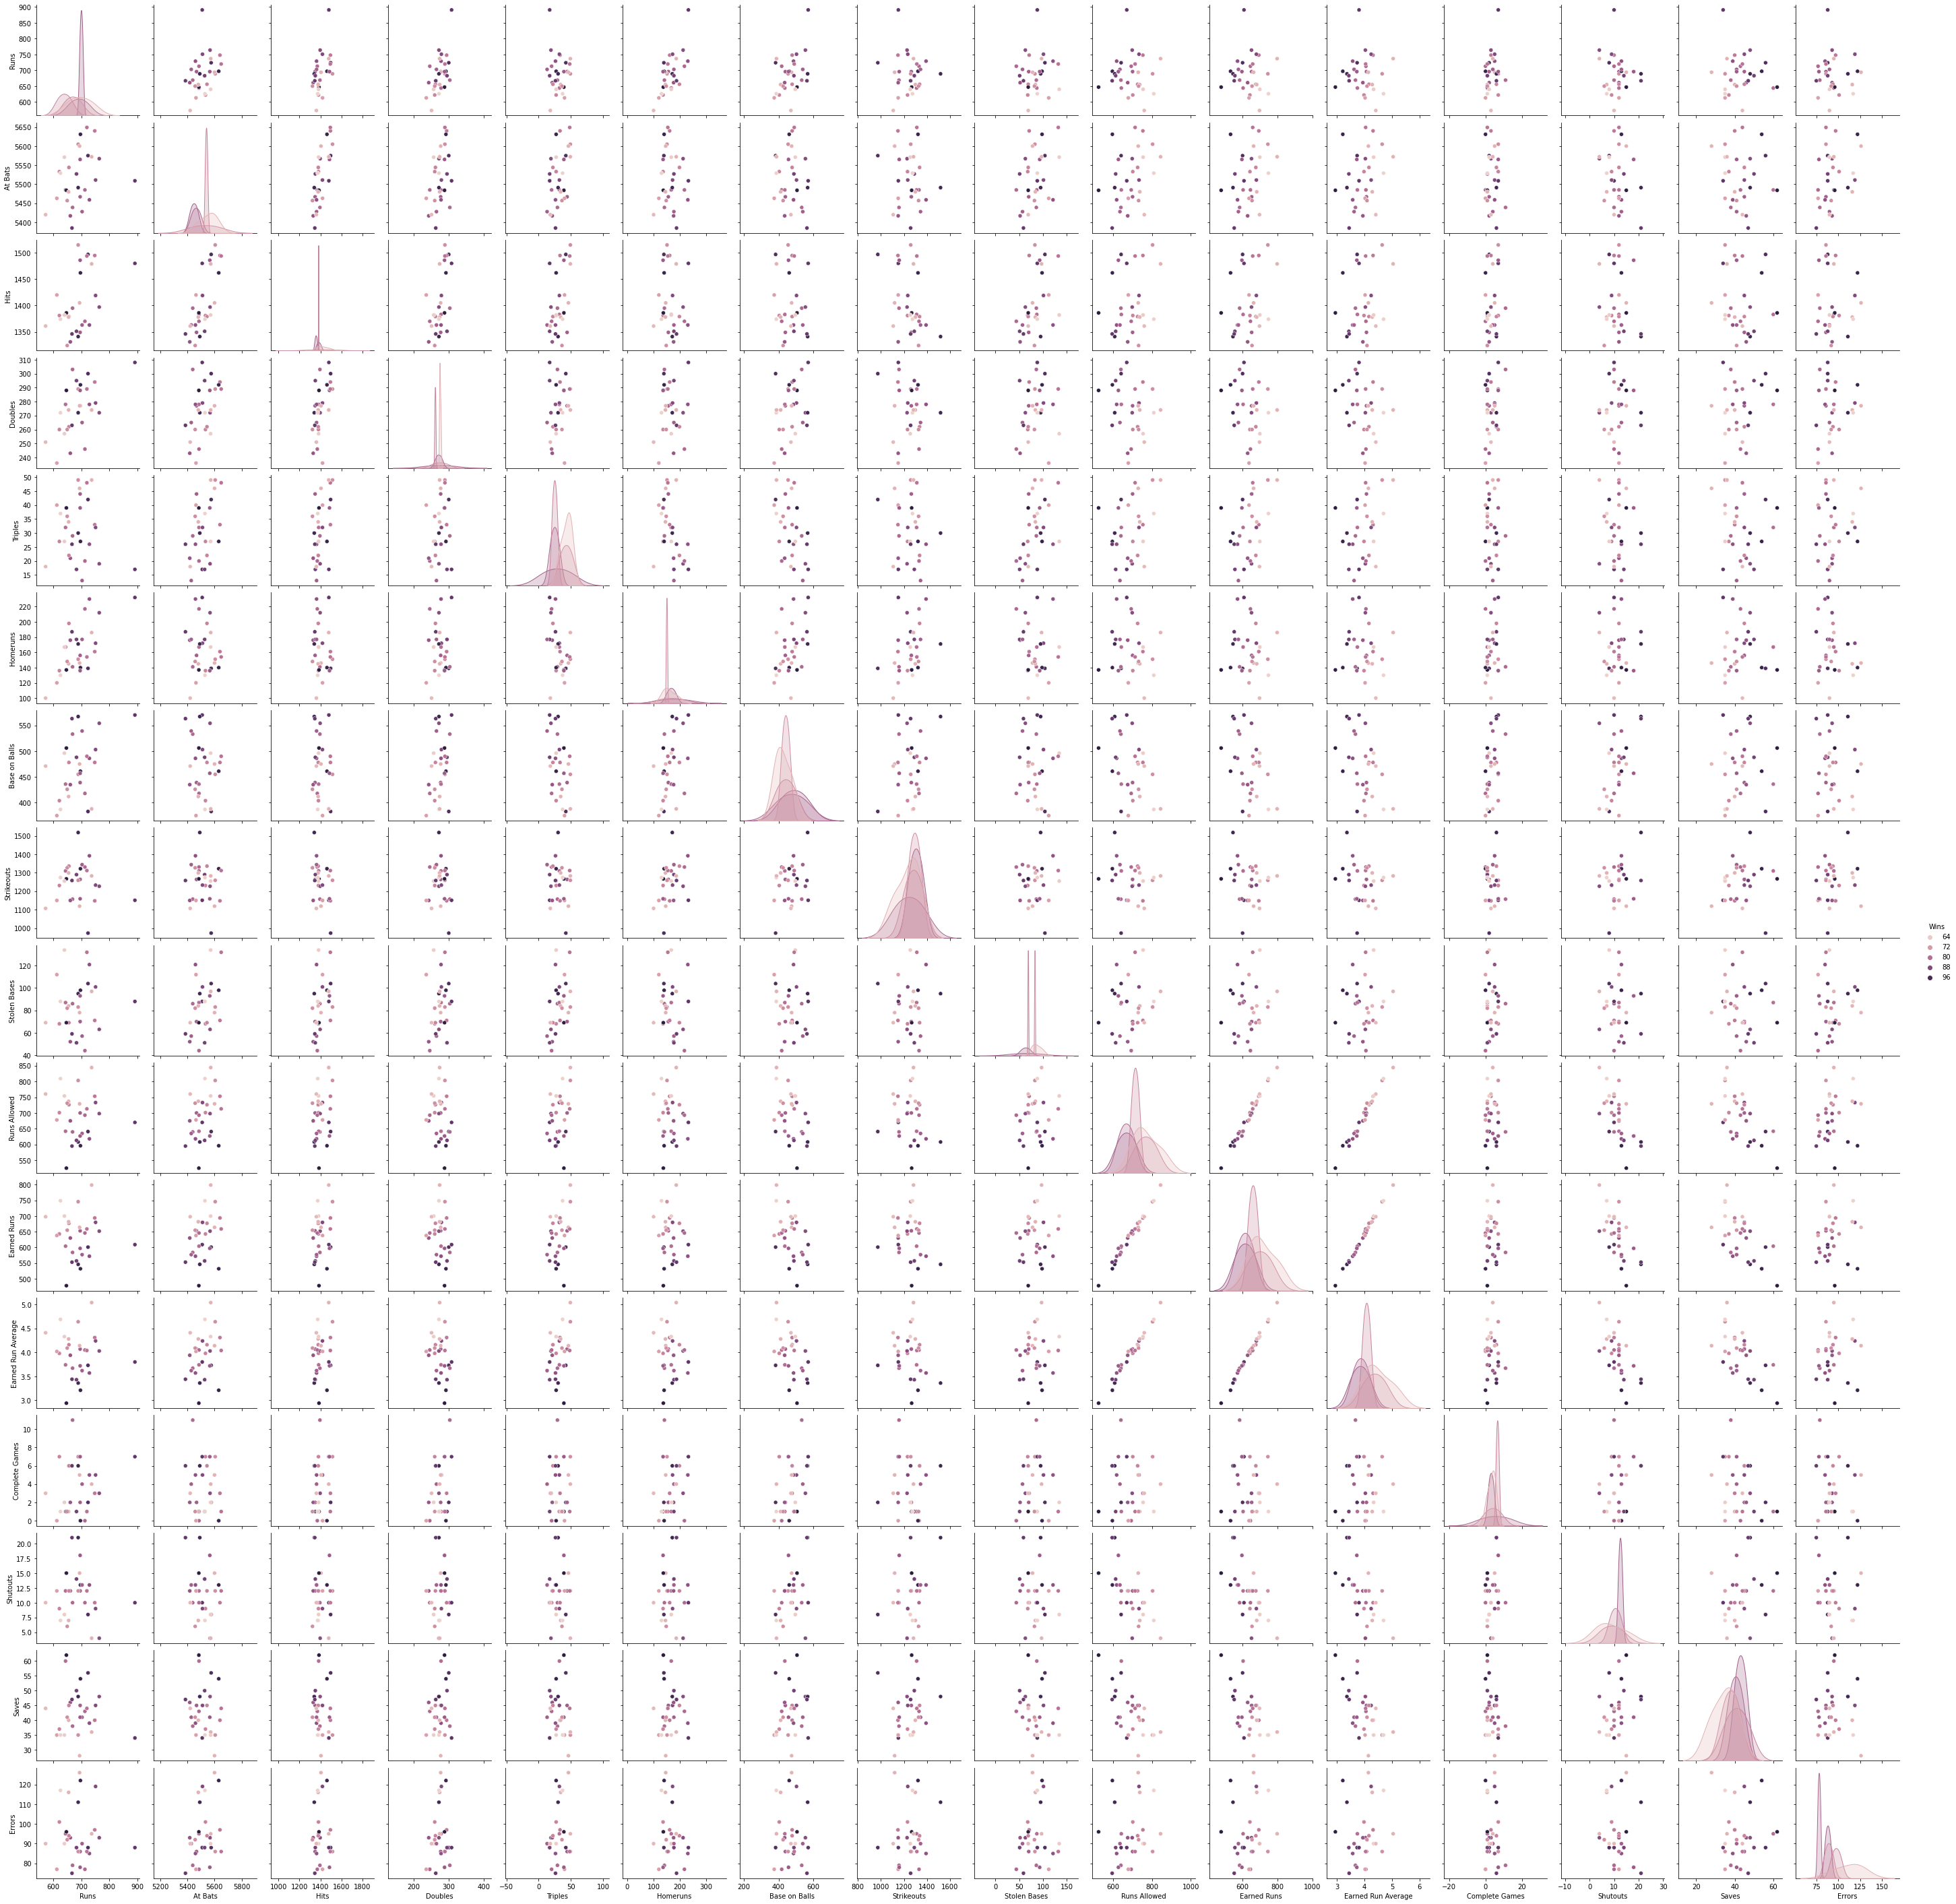

In [33]:
sns.pairplot(df,hue = 'Wins')

<AxesSubplot:>

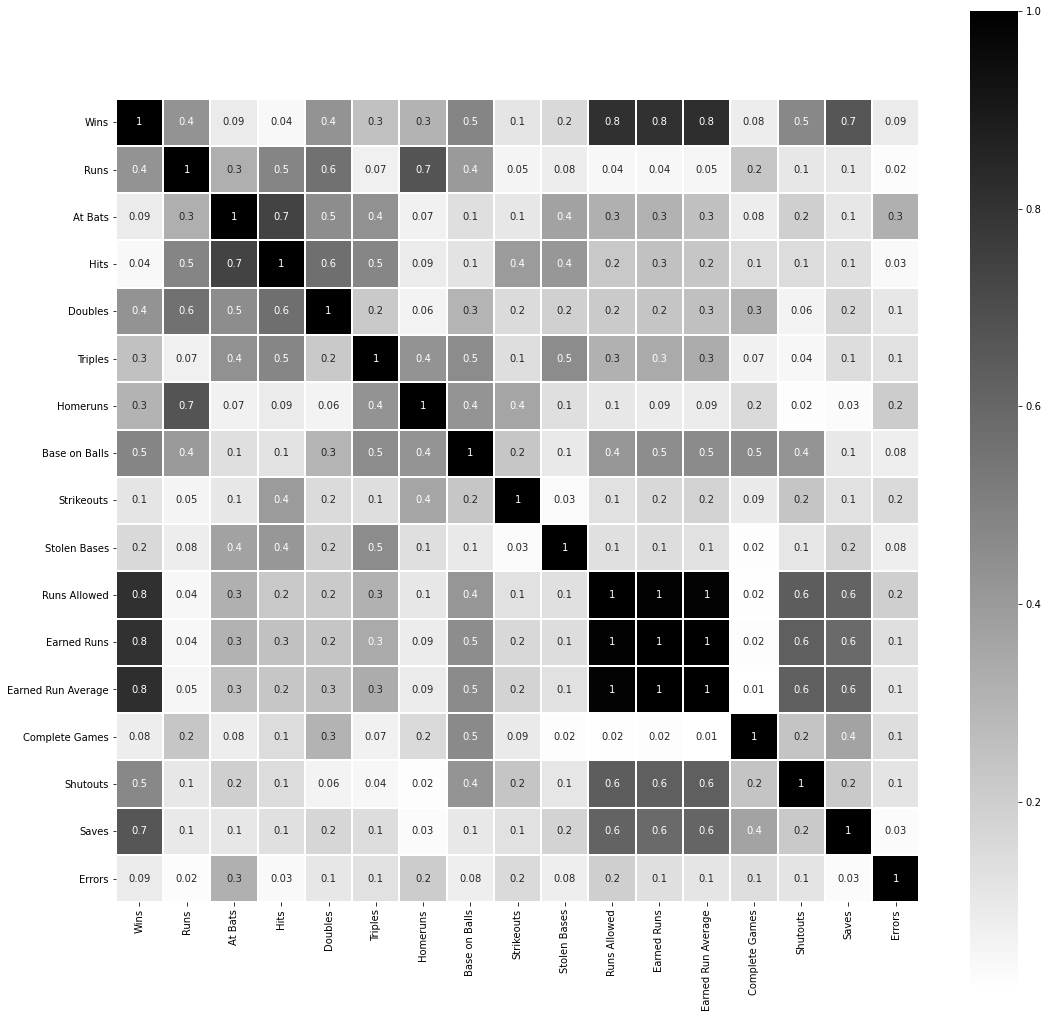

In [34]:
df_corr = df.corr().abs()
plt.figure(figsize = (18,18))
sns.heatmap(df_corr,annot = True,square = True,
           linewidth =1,fmt ='.1g',cmap = "binary")

From the observation of the heatmap there is major relation between runs allowed , earned runs and earned runs average column

In [35]:
#finding boundary values
print('Highest allowed',df['Runs'].mean()+3*df['Runs'].std())
print('Highest allowed',df['Earned Run Average'].mean()+3*df['Earned Run Average'].std())
print('Highest allowed',df['Shutouts'].mean()+3*df['Shutouts'].std())
print('Highest allowed',df['Saves'].mean()+3*df['Saves'].std())
print('Highest allowed',df['Errors'].mean()+3*df['Errors'].std())

Highest allowed 864.5185939294713
Highest allowed 5.318599067701809
Highest allowed 23.660532295200305
Highest allowed 66.67467232225907
Highest allowed 136.20999953796087


As we can see there are outliers present in the dataset so from that columns we get the highest allowed value 

In [36]:
df[(df['Runs']>864.51)|(df['Earned Run Average']>5.31)|(df['Shutouts']>23.66)|(df['Saves']>66.67)|(df['Errors']>136.20)]

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Base on Balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


From the above observation we can see that there is only one single column which have higher value than the highest allowed value so we have to remove that row from the dataset

In [37]:
new_df = df[(df['Runs']<864.51)]

In [38]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss :',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (30, 17)
Shape After: (29, 17)
Percentage Loss : 3.3333333333333335


After removing that row from the datset in result we get 3.33 % dataloss and this dataloss is acceptable

In [39]:
new_df.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Base on Balls         0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games        0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

After removing the outliers from the dataset we have to check skewness of the dataset and and by checking this we can see that there are skewness preseent in some columns 

In [40]:
import numpy as np
new_df['Hits'] = np.log(new_df['Hits'])
new_df['Complete Games'] = np.sqrt(new_df['Complete Games'])
new_df['Shutouts'] = np.sqrt(new_df['Shutouts'])
new_df['Saves'] = np.sqrt(new_df['Saves'])
new_df['Errors'] = np.log(new_df['Errors'])

Because we have skewness in some columns , we removed skewness by sqrt and log method

In [41]:
new_df.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.738423
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Base on Balls         0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games       -0.260678
Shutouts             -0.085802
Saves                 0.370280
Errors                0.583308
dtype: float64

After removing skewness the dataset is ready to perform the algorithms

In [42]:
x = new_df.drop('Wins' ,axis = 1)
y = new_df['Wins']

Seprating the target variable from the dataset

In [43]:
scaler  =StandardScaler()
x_scaled = scaler.fit_transform(x)

Scaling the dataset by standard scaler method

In [44]:
maxR2 = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    R2_score = r2_score(y_test,pred)
    if R2_score > maxR2:
        maxR2 = R2_score
        maxRS = i
print('R2_Score is',maxR2,'on random_state',maxRS)    

R2_Score is 0.9045345951748243 on random_state 106


Calculating the maxR2 and maxRS , by calculating the we get 106 as random state

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

R2_Score of Linear regression: 0.9045345951748243
MAE: 2.9844228514273947
MSE: 12.70734037040112
RMSE: 3.5647356662733243


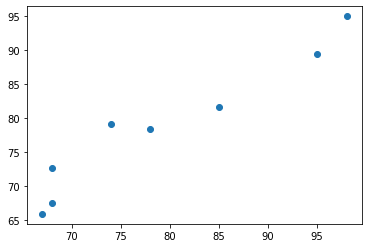

In [46]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

By fitting the model by linear regression we get 0.90 as r_2 score

R2_score of Random Forest: 0.56884620260594
MAE: 6.746249999999998
MSE: 57.39061249999996
RMSE: 7.57565921224021


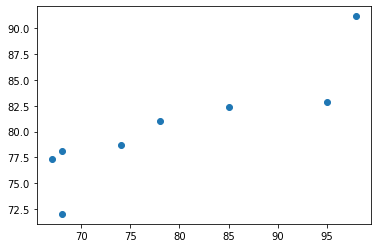

In [47]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

By fitting the model by RandomForestRegressor we get 0.57 as r_2 score

R2_score of KNN : 0.561601126892828
MAE: 6.474999999999998
MSE: 58.354999999999976
RMSE: 7.639044442860636


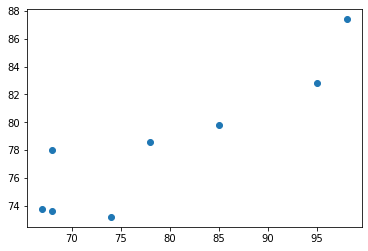

In [48]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

By fitting the model by KNeighborsRegressor we get 0.56 as r_2 score

R2_score of SVR : 0.08181636409346182
MAE: 9.91260395330683
MSE: 122.21884991074685
RMSE: 11.055263448274168


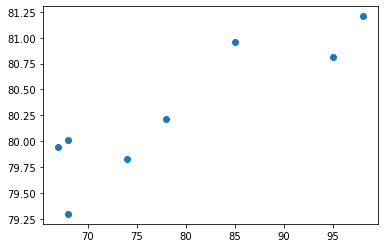

In [49]:
#Applying SVR
SVR = svm.SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
plt.scatter(x=y_test,y=predsvr)

R2_score of DT: 0.6224909026881089
MAE: 6.25
MSE: 50.25
RMSE: 7.088723439378913


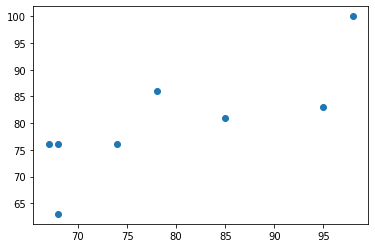

In [50]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

In [51]:
#GridSearchCV Parameters for RandomForestRegressor
parameters ={'n_estimators':[30,40,50,70,90],
             'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,5,8],
             'min_samples_leaf':[1,3,5,7,6,4]}

GCVRF = GridSearchCV(rf,parameters,cv = 5)

GCVRF.fit(x_train,y_train)
GCVRF.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

By applying GridSearchCV to the RandomForestRegressor we get best parameters 

r2_score of the model is 51.82804450183247
MAE: 7.016666666666669
MSE: 64.12138888888893
RMSE: 8.00758321148703


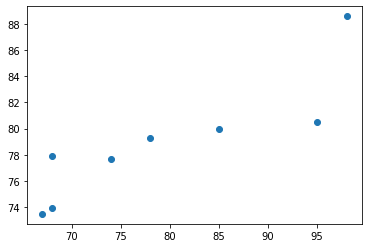

In [52]:
RFmod = RandomForestRegressor(criterion = 'mse',max_features = 'sqrt',min_samples_leaf = 1,min_samples_split = 2,n_estimators = 30)
RFmod.fit(x_train,y_train)
pred = RFmod.predict(x_test)
print('r2_score of the model is',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

And fitting the model with best params we get 51.82 as r2 score

In [53]:
#Parameters for KNN

parameters = {'n_neighbors':[3,4,5,6,7],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[30,40,20]}
GCVknn = GridSearchCV(KNN,param_grid = parameters,cv = 5)
GCVknn.fit(x_train,y_train)
GCVknn.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'distance'}

By applying GridSearchCV to the KNN we get best parameters 

R2 Score of the final Model: 66.38007238485363
MAE: 5.503077186619896
MSE: 44.75127552397372
RMSE: 6.68963941658844


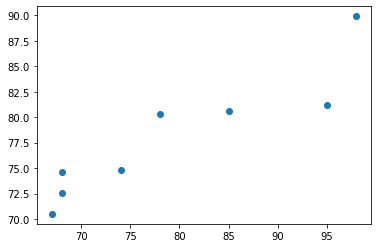

In [54]:
KNNmod = KNeighborsRegressor(algorithm = 'auto',leaf_size = 30,n_neighbors = 3,weights = 'distance')
KNNmod.fit(x_train,y_train)
pred = KNNmod.predict(x_test)
print('R2 Score of the final Model:',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

And fitting the model with best params we get 66.30 as r2 score

In [55]:
#Decision Tree

parameters = {'criterion' :['mse', 'friedman_mse', 'mae', 'poisson'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'splitter' :['best', 'random']}
GCVDT = GridSearchCV(DecisionTreeRegressor(),parameters,cv = 5)
GCVDT.fit(x_train,y_train)
GCVDT.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

By applying GridSearchCV to the DecisionTreeRegressor we get best parameters 

R2 Score of the final Model: 51.19145439605588
MAE: 7.0625
MSE: 64.96875
RMSE: 8.060319472576754


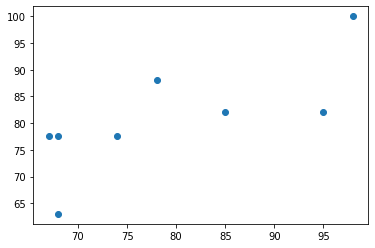

In [56]:
DTmod = DecisionTreeRegressor(criterion = 'friedman_mse',max_features = 'auto',max_depth = 4,splitter = 'best')

DTmod.fit(x_train,y_train)
pred = DTmod.predict(x_test)
print('R2 Score of the final Model:',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

And fitting the model with best params we get 51.30 as r2 score

In [57]:
#SVR
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto'],
             'degree':[2,3,4,5,6],
             'shrinking':[True , False]}
GCVSVR  = GridSearchCV(SVR,parameters,cv= 5)
GCVSVR.fit(x_train,y_train)
GCVSVR.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': False}

By applying GridSearchCV to the SVR we get best parameters 

R2 Score of the final Model: 81.63741557731922
MAE: 3.74097809316031
MSE: 24.442321358877752
RMSE: 4.9439176124686535


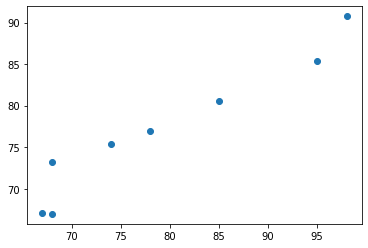

In [58]:
SVRmod = svm.SVR(degree= 2, gamma= 'scale', kernel= 'linear', shrinking= False)

SVRmod.fit(x_train,y_train)
pred = SVRmod.predict(x_test)
print('R2 Score of the final Model:',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

And fitting the model with best params we get 81.63 as r2 score

And from above observation we can use SVR as best model to predict 


In [59]:
import joblib
joblib.dump(SVRmod,'BaseballCaseStudy.pkl')

['BaseballCaseStudy.pkl']